## Atividade 14.1

Você é um analista de dados trabalhando para uma empresa de
marketing que deseja segmentar seus clientes com base em seus
padrões de compra. Você tem um conjunto de dados contendo
informações sobre os gastos anuais dos clientes em diferentes
categorias de produtos. O objetivo é usar o algoritmo K-means para
agrupar os clientes em segmentos distintos, a fim de personalizar
campanhas de marketing para cada grupo.

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Carregando o arquivo CSV
df = pd.read_csv("/content/14.1 - customer_data.csv")

# Verificar as colunas
df.columns
df.head()

,ID,Renda Anual,Gastos em Roupas,Gastos em Alimentos,Gastos em Eletrônicos,Gastos em Saúde
0,1,40000,5000,6000,1500,2000
1,2,52000,7000,8000,3000,4000
2,3,30000,3000,4000,1000,1500
3,4,60000,9000,10000,5000,7000
4,5,45000,5000,6000,2000,3000


In [16]:
# remover tabela de ID
df = df.drop('ID', axis=1)

# Normalização dos dados com standardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Aplicando k-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Adicionando os clusters ao DataFrame original
df['cluster'] = clusters

print("Centroides: ")
print(kmeans.cluster_centers_)


Centroides: 
[[-1.24871638 -1.2548939  -1.2548939  -1.44126001 -1.43085608 -1.23861052]
 [ 1.78838384  2.00393909  2.00393909  1.56587802  1.5597287   1.91039927]
 [-0.24615464 -0.16861623 -0.16861623 -0.07849674 -0.05888677 -0.30822126]
 [ 0.81001489  0.56449783  0.56449783  0.77986603  0.7353407   0.86072934]]


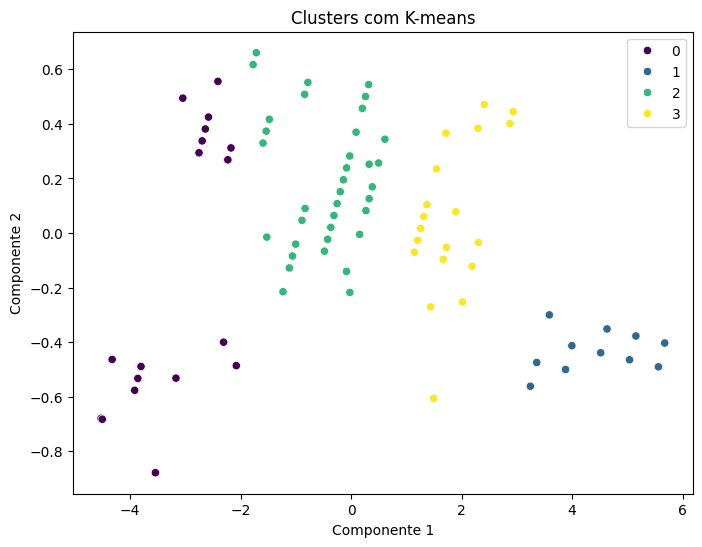

In [17]:
# Visualização dos clusters
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
dados_2d = pca.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=dados_2d[:,0], y=dados_2d[:,1], hue=clusters, palette="viridis")
plt.title("Clusters com K-means")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

In [18]:
# Entendendo cada grupo
df.groupby('cluster').mean()

,Renda Anual,Gastos em Roupas,Gastos em Alimentos,Gastos em Eletrônicos,Gastos em Saúde
cluster,,,,,
0,38954.545455,4681.818182,5681.818182,2586.363636,3472.727273
1,95272.727273,13818.181818,14818.181818,9527.272727,10527.272727
2,57545.454545,7727.272727,8727.272727,5731.818182,6709.090909
3,77130.434783,9782.608696,10782.608696,7713.043478,8582.608696


## Interpretação

| Cluster | Renda Anual | Roupas | Alimentos | Eletrônicos | Saúde  | Perfil                                                                      |
| ------- | ----------- | ------ | --------- | ----------- | ------ | ------------------------------------------------------------------------------ |
| **0**   | \~39.954    | 4.682  | 5.681     | 2.586       | 3.472  |  **Econômico** – renda e gastos mais baixos em todas as categorias           |
| **1**   | \~95.272    | 13.818 | 14.818    | 9.527       | 10.527 |  **Premium** – alta renda e alto consumo em todas as categorias              |
| **2**   | \~57.545    | 7.727  | 8.727     | 5.731       | 6.709  |  **Classe Média** – consumo equilibrado e compatível com renda intermediária |
| **3**   | \~77.130    | 9.782  | 10.782    | 7.713       | 8.582  | **Classe Média Alta** – bons gastos, mas não tão altos quanto o cluster 1   |


## Questão 14.2

Você é um analista de dados trabalhando para uma empresa de
marketing que deseja segmentar seus clientes com base em seus
padrões de compra. Você tem um conjunto de dados contendo
informações sobre os gastos anuais dos clientes em diferentes
categorias de produtos. O objetivo é usar o algoritmo de Modelagem de
Misturas Gaussianas (GMM) para agrupar os clientes em diferentes
segmentos, assumindo que os dados seguem uma distribuição
gaussiana em cada cluster.

In [19]:
# Utilizando o mesmo processamento, apenas normalizando para o novo modelo GMM
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=42)
gmm_clusters = gmm.fit_predict(df_scaled)

df['gmm_cluster'] = gmm_clusters

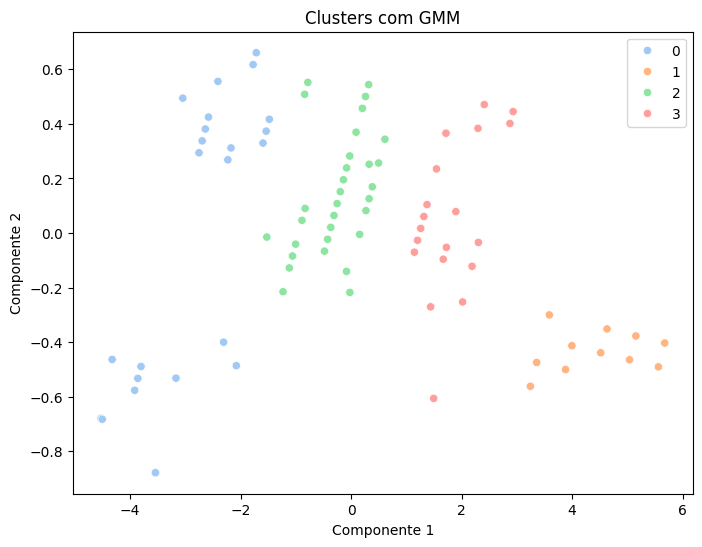

In [20]:
# Visualização
plt.figure(figsize=(8,6))
sns.scatterplot(x=dados_2d[:,0], y=dados_2d[:,1], hue=gmm_clusters, palette="pastel")
plt.title("Clusters com GMM")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()


In [21]:
# Parâmetros gaussianos
print("Médias de cada cluster (GMM):")
print(gmm.means_)

print("Covariâncias de cada cluster (GMM):")
print(gmm.covariances_)

Médias de cada cluster (GMM):
[[-1.15239128 -1.12819153 -1.12819153 -1.25884346 -1.24344496 -1.23861052]
 [ 1.78838384  2.00393909  2.00393909  1.56587802  1.5597287   1.91039927]
 [-0.18430769 -0.11706689 -0.11706689 -0.03007189 -0.01273943 -0.18894059]
 [ 0.81001489  0.56449783  0.56449783  0.77986603  0.7353407   0.86072934]]
Covariâncias de cada cluster (GMM):
[[[ 1.43167933e-01  1.48367842e-01  1.48367842e-01  1.50786042e-01
    1.61385737e-01  0.00000000e+00]
  [ 1.48367842e-01  2.02446401e-01  2.02445401e-01  2.21457198e-01
    2.34009979e-01  0.00000000e+00]
  [ 1.48367842e-01  2.02445401e-01  2.02446401e-01  2.21457198e-01
    2.34009979e-01  0.00000000e+00]
  [ 1.50786042e-01  2.21457198e-01  2.21457198e-01  3.88190816e-01
    4.10570969e-01  0.00000000e+00]
  [ 1.61385737e-01  2.34009979e-01  2.34009979e-01  4.10570969e-01
    4.38589016e-01  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    0.00000000e+00  1.00000000e-06]]

 [[ 1.4440045

In [22]:
# Entendendo cada grupo
df.groupby('gmm_cluster').mean()

,Renda Anual,Gastos em Roupas,Gastos em Alimentos,Gastos em Eletrônicos,Gastos em Saúde,cluster
gmm_cluster,,,,,,
0,40740.740741,5037.037037,6037.037037,3007.407407,3914.814815,0.37037
1,95272.727273,13818.181818,14818.181818,9527.272727,10527.272727,1.00000
2,58692.307692,7871.794872,8871.794872,5843.589744,6817.948718,2.00000
3,77130.434783,9782.608696,10782.608696,7713.043478,8582.608696,3.00000


## Interpretação

| GMM Cluster | Renda Anual | Roupas | Alimentos | Eletrônicos | Saúde  |  Perfil                |
| ----------- | ----------- | ------ | --------- | ----------- | ------ | ------------------------ |
| **0**       | \~40.740    | 5.037  | 6.037     | 3.007       | 3.915  | **Econômico**         |
| **1**       | \~95.272    | 13.818 | 14.818    | 9.527       | 10.527 |  **Premium**           |
| **2**       | \~58.692    | 7.872  | 8.872     | 5.843       | 6.817  |  **Classe Média**      |
| **3**       | \~77.130    | 9.782  | 10.782    | 7.713       | 8.582  |  **Classe Média Alta** |


## Comparação entre os dois modelos

| Característica       | K-means                            | GMM                                     |
| -------------------- | ---------------------------------- | --------------------------------------- |
| Forma dos clusters   | Redondos (esféricos)               | Elípticos (mais realistas)              |
| Atribuição           | Dura (um cluster por ponto)        | Probabilística (soft, mistura de pert.) |
| Separação dos grupos | Mais rígida, bem separada          | Pode haver sobreposição                 |
| Aplicação ideal      | Grupos bem definidos por distância | Grupos com variabilidade interna        |

**K-MEANS clusters**

| Cluster | Renda  | Roupas | Alimentos | Eletrônicos | Saúde  |
| ------- | ------ | ------ | --------- | ----------- | ------ |
| 0       | 38.955 | 4.682  | 5.682     | 2.586       | 3.473  |
| 1       | 95.273 | 13.818 | 14.818    | 9.527       | 10.527 |
| 2       | 57.545 | 7.727  | 8.727     | 5.732       | 6.709  |
| 3       | 77.130 | 9.783  | 10.783    | 7.713       | 8.583  |


**GMM clusters**

| Cluster | Renda  | Roupas | Alimentos | Eletrônicos | Saúde  |
| ------- | ------ | ------ | --------- | ----------- | ------ |
| 0       | 40.741 | 5.037  | 6.037     | 3.007       | 3.915  |
| 1       | 95.273 | 13.818 | 14.818    | 9.527       | 10.527 |
| 2       | 58.692 | 7.872  | 8.872     | 5.844       | 6.818  |
| 3       | 77.130 | 9.783  | 10.783    | 7.713       | 8.583  |


**Análise Comparativa**

| Grupo         | Comparação K-means vs GMM           | Diferenças Relevantes?                                  | Interpretação                                                |
| ------------- | ----------------------------------- | ------------------------------------------------------- | ------------------------------------------------------------ |
| **Cluster 0** | Ambos têm menor renda e menor gasto | Diferença leve (\~1.8k em renda, \~400 a 500 em gastos) | Ambos identificaram o grupo **econômico**                    |
| **Cluster 1** | Mesmos valores exatos               | Nenhuma diferença                                       | Cluster **premium** foi identificado da mesma forma          |
| **Cluster 2** | GMM tem leve aumento (\~1k em tudo) | Pequenas diferenças                                     | Ambos representam a **classe média**, com GMM mais suavizado |
| **Cluster 3** | Iguais nos dois modelos             | Nenhuma diferença                                       | Representa **classe média alta**, consistente                |

Os mesmos perfis foram detectados pelos dois modelos, os clusters 1 e 3 são idênticos entre o K-menase o GMM enquanto os outros ficaram levemente diferentes.